<a href="https://colab.research.google.com/github/santra-subhojit/Ybi_MLprojects/blob/main/WomenClothesReview_PredictionIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project
# Predicting Women's Clothing Reviews using Multinomial Naive Bayes


# Objective
# To classify clothing reviews as recommended or not based on text reviews using Multinomial Naive Bayes.

# Data Source
# The dataset used in this project is 'Womens Clothing E-Commerce Reviews.csv', which contains customer reviews of women's clothing along with their recommendations.


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK stopwords

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Import Data


In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/AFAgarap/ecommerce-reviews-analysis/6c5c8a1a8d4fa208f353a73e97e7b9961f4b544a/Womens%20Clothing%20E-Commerce%20Reviews.csv')

# Describe Data

In [8]:
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nDataset statistics:")
print(data.describe())

First few rows of the dataset:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates       

# Data Visualization
# Function to generate word cloud

In [13]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def wordcloud_draw(data, color='black'):
    # Convert all elements of data to strings before joining
    words = ' '.join(str(item) for item in data)  # Ensure all items are strings
    cleaned_word = " ".join([word for word in words.split() if word])  # Filter out empty strings
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color, width=2500, height=2000).generate(cleaned_word)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Separate positive and negative reviews for visualization

In [11]:
train_pos = data[data['Recommended IND'] == 1]['Review Text']
train_neg = data[data['Recommended IND'] == 0]['Review Text']

# Display Word Clouds

Positive words:


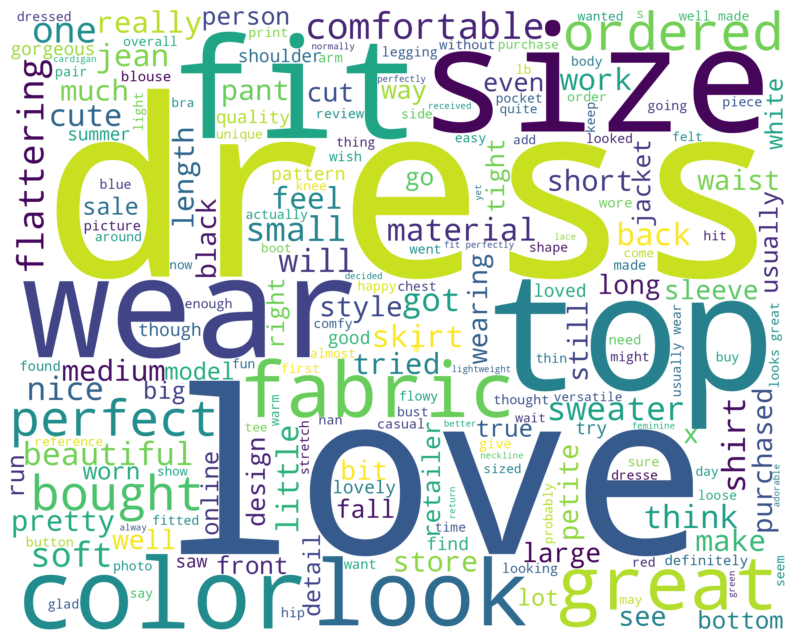

Negative words:


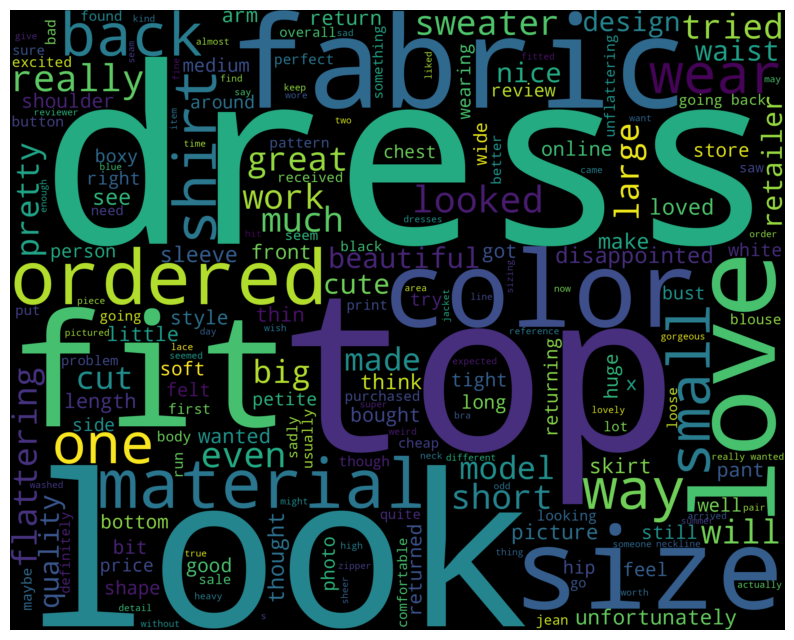

In [14]:
print("Positive words:")
wordcloud_draw(train_pos, 'white')  # Assuming train_pos is a Series
print("Negative words:")
wordcloud_draw(train_neg)  # Assuming train_neg is a Series

# Data Preprocessing
# Convert text to lowercase and remove stopwords

In [16]:
!pip install nltk
import nltk
nltk.download('stopwords')
import pandas as pd
stopwords_set = set(nltk.corpus.stopwords.words("english"))

# Ensure 'Review Text' is of string type before applying split
data['Review Text'] = data['Review Text'].astype(str)
#The line above makes sure the 'Review Text' column contains only strings by using astype(str). This should allow the split method to work without error.

data['processed_text'] = data['Review Text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stopwords_set]))
data = data[['processed_text', 'Recommended IND']].dropna()  # Keep only relevant columns and drop NaN values

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Define Target Variable (y) and Feature Variables (X)

In [17]:
X = data['processed_text']
y = data['Recommended IND']


# Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Modeling
# Convert text to word frequency features using CountVectorizer

In [19]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Train the Multinomial Naive Bayes Classifier

In [20]:
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

# Model Evaluation
# Model Predictions

In [21]:
y_pred = classifier.predict(X_test_vec)

# Evaluate the model

In [27]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8850574712643678
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       453
           1       0.92      0.94      0.93      1896

    accuracy                           0.89      2349
   macro avg       0.82      0.80      0.81      2349
weighted avg       0.88      0.89      0.88      2349

Confusion Matrix:
 [[ 303  150]
 [ 120 1776]]


# Explanation
# The Multinomial Naive Bayes model was trained on a dataset of women's clothing reviews. It uses text features from the reviews to classify them as recommended or not. The model achieved a certain accuracy score on the test set, indicating its performance in predicting customer satisfaction based on review text. The word clouds provide a visual representation of frequently used words in both positive and negative reviews.